In [205]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import pandas as pd



def notchFilter(emg_signal, f0, Q, fs):
     
    emg_signal = emg_signal - emg_signal.mean(axis=0)             # Normalize the data
    filtered_signal = pd.DataFrame()

    # Compute the notch filter coefficients
    w0 = f0 / (fs/2)
    b, a = signal.iirnotch(w0, Q)
       
    filtered_signal = signal.filtfilt(b, a, emg_signal)
    df_filtered = pd.DataFrame(filtered_signal, columns= emg_signal.columns)

    
    return df_filtered






def bandPassFilter(emg_signal, lowcut, highcut, fs, order=4):

    # Compute the bandpass filter cutoff frequencies
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    filtered_signal = pd.DataFrame()
    
    
    # Compute the bandpass filter coefficients
    b, a = signal.butter(1, [low, high], btype='bandpass', fs=nyquist)    
    filtered_signal = signal.filtfilt(b, a, emg_signal)
    df_filtered = pd.DataFrame(filtered_signal, columns= emg_signal.columns)
    
    return df_filtered




def plotSignal(emg_signal, samplerate, title):
    time = np.arange(0, len(emg_signal) / samplerate, 1 / samplerate)   # Get the total time
    plt.plot(time, emg_signal)
    plt.autoscale(tight=True)
    plt.xlabel('Time (msecs)')
    plt.ylabel('Amplitude (mV)')
    plt.title(title)
    plt.show()

In [206]:
# Load dataset merged_files.csv.drop(['time', 'class', 'label'], axis=1)
signal_path = 'C:/Users/saraa/OneDrive/Desktop/CDSS - Final Project/data/csv files/merged_files.csv'
emg_signal = pd.read_csv(signal_path, engine="python")
sampling_frequency = 1000   # Hz 

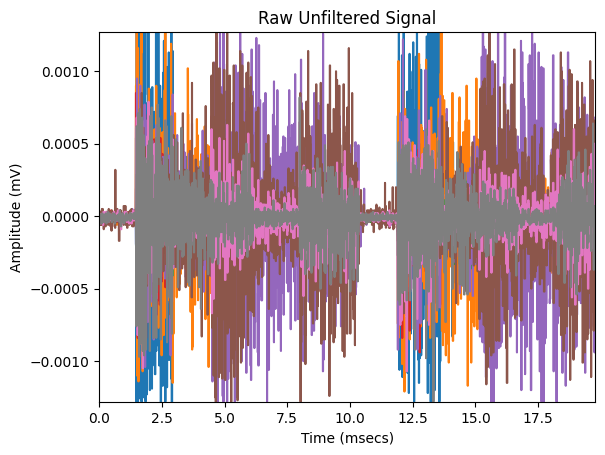

In [207]:
# Plot raw sEMG signal
title = "Raw Unfiltered Signal"
plotSignal(emg_signal.drop(['time','class','label'], axis=1), sampling_frequency, title)
#print(emg_signal)

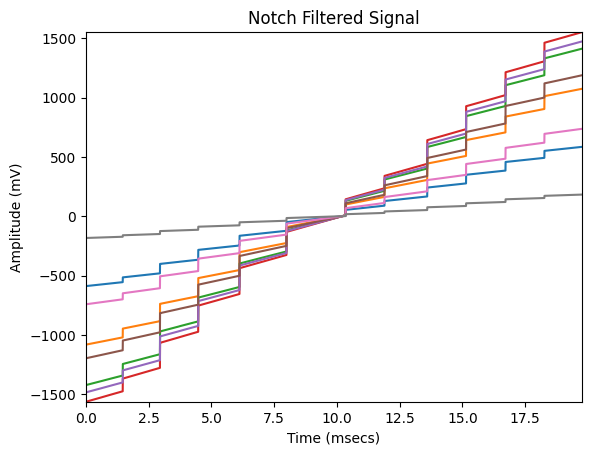

(19772, 11)

In [208]:
# EMG Signal Preprocessing
#emg_signal = emg_signal.reshape((emg_signal.size,))
title = "Notch Filtered Signal"
notch_signal = notchFilter(emg_signal, 60, 30, sampling_frequency)  
plotSignal(notch_signal.drop(['time','class','label'], axis=1), sampling_frequency, title)      
notch_signal.shape               

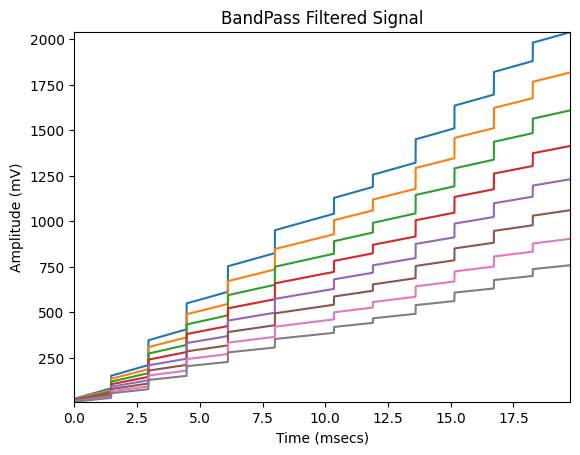

(19772, 11)

In [209]:
filtered_signal = bandPassFilter(emg_signal, 20, 500, sampling_frequency)     # Take the output of notch filter
title = "BandPass Filtered Signal"
plotSignal(filtered_signal.drop(['time','class','label'], axis=1), sampling_frequency, title)      
filtered_signal.shape               